<a href="https://colab.research.google.com/github/hank199599/deep_learning_keras_log/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-1 文件資料的預處理 (Preprocessing)
文件資料的基本單位：
* 單字(word)
* 字元(characters)
  
在神經網路的訓練中，我們使用文件向量化(text vertorizing)來進行轉換

## 文件向量化 (text vectorizing)
1. 將文件資料分解為小單元(單字、字元或n元語法)
2. 經由一個字點對照表將token編碼成數值向量
3 進行one-hot-encodeing將token向量化
4. 將這些數據向量把包成序列張量送入神經網路  
![pic 6-1](https://raw.githubusercontent.com/hank199599/deep_learning_keras_log/main/pictures/6-1.png)

## one-hot encoding
  取得的向量是二進位、稀疏矩陣
1. 建立一個字典
2. 收錄到字典當作鍵(key)
3. 給每個鍵值唯一的整數作為鍵值(value)

#### 單字的one-hot encoding

In [2]:
import numpy as np

samples = ['The cat sat on the mat.','The dog eat my homework.']

token_index = {}

# 建立字典
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word]=len(token_index)+1

# 字典建立完成

max_length = 10

results = np.zeros(shape=(len(samples),max_length,max(token_index.values())+1))

print(results.shape)

for i,sample in enumerate(smaples):
  for j , word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1. # 把對應元素設為1

(2, 10, 11)


In [3]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

#### 字元的one-hot encoding

In [4]:
import string

samples = ['The cat sat on the mat.','The dog eat my homework.']
characters = string.printable
print(len(characters))

token_index = dict(zip(characters,range(1,len(characters)+1)))

# 字典建立完成

max_length = 50

results = np.zeros(shape=(len(samples),max_length,max(token_index.values())+1))

print(results.shape)

for i,sample in enumerate(smaples):
  for j , character in enumerate(sample):
    index = token_index.get(character)
    results[i,j,index] = 1. # 把對應元素設為1

100
(2, 50, 101)


In [5]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#### 用Keras的內建工具 做 one-hot encoding

In [8]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.','The dog eat my homework.']

tokenizer = Tokenizer(num_words=1000) # 建立分類器，處理前1000個最常用的單字
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

print(sequences)

one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary')

print(one_hot_results.shape)
print(one_hot_results[0][:15]) # 第一個樣本的前15個
print(one_hot_results[1][:15]) # 第二個樣本的前15個

word_index = tokenizer.word_index
print('Found %s unique tokens'% len(word_index))

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
(2, 100)
[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
Found 9 unique tokens


#### 使用雜湊技巧做 one-hot encoding

In [9]:
samples = ['The cat sat on the mat.','The dog eat my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples),max_length,dimensionality))

for i ,smaple in enumerate(samples):
  for j,eord in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word))%dimensionality # 將token雜湊成0到1000之間的隨機整數索引
    results[i,j,index] = 1.

print(results.shape)

(2, 10, 1000)


## 文字崁入法 Word Embeddings
 低維度的浮點數向量
 * 從資料中學習向量的分類方式
 * 將更多資訊壓縮到更少的維度中

## 建立文字崁入向量的方法
 ① 使用Embdding layer   
 ② 直接套用其他機器學習以訓練好的文字崁入向量

### 用Keras 的 Embeddung Layer來實作文字崁入法


In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000,64)

建立 Embedding 層時,其權重(其token向量的內部字典)最初是隨機設定的、就如同任何其它層一樣。  
在訓練期間,這些文字向量通過反向傳播逐漸調整,建構出嵌入空間以供下游模型使用。  
一旦完成訓練,嵌入空間將學習出許多結構,

In [14]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features) # 將文字評論以整數(鍵值)list載入

print(x_train.shape)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
print(x_train.shape)

print(x_train[0])

x_test = preprocessing.sequence.pad_sequences(x_test,maxlen = maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(25000,)
(25000, 20)
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


#### 訓練模型

In [19]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6836 - acc: 0.5695 - val_loss: 0.6076 - val_acc: 0.6954
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5576 - acc: 0.7448 - val_loss: 0.5207 - val_acc: 0.7340
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4666 - acc: 0.7881 - val_loss: 0.4993 - 

In [28]:
# 驗證準確度: 約 74.66%
print(history.history['val_acc'][-1])

0.7477999925613403


#### 直接套用其他機器學習以訓練好的文字崁入向量  
使用前提：  
這些訓練好的崁入向量必須是**高度結構化**→涵蓋語言結構的普遍特性
* [Word2vec](https://code.google.com/archive/p/word2vec)
* [GloVe](https://nlp.stanford.edu/projects/glove)

## 自原始文字資料到文字崁入向量 [*本地端進行*]

### 下載[IMDB資料](https://ai.stanford.edu/~amaas/data/sentiment/)作為原始資料

In [5]:
import os

imdb_dir = './data/aclImdb'
train_dir=os.path.join(imdb_dir,'train')

labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
print(len(texts))

25000


#### 對資料進行向量化

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 

maxlen = 100
training_smaples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print('共使用了 %s 個token字詞' %len(word_index))

data = pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)

print('資料張量 shape:',data.shape)
print('標籤張量 shape:',labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_smaples]
y_train = labels[:training_smaples]
x_val = data[training_smaples:training_smaples+validation_samples]
y_val = labels[training_smaples:training_smaples+validation_samples]

共使用了 88582 個token字詞
資料張量 shape: (25000, 100)
標籤張量 shape: (25000,)


#### 下載 [GLOVE](https://nlp.stanford.edu/projects/glove/) 文字崁入向量
使用其中的100維數值向量做為所需要的資料


In [7]:
glove_dir = './data'

embeddings_index ={}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('共使用了 %s 個文字崁入向量' % len(embeddings_index))

共使用了 400000 個文字崁入向量


#### 準備 GloVe 文字嵌入向量矩陣

In [8]:
embedding_dim= 100

embedding_matrix = np.zeros((max_words,embedding_dim))

for word,i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_matrix[i] is not None:
            embedding_matrix[i] = embedding_vector

#### 模型定義

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# 參數 樣本數, 嵌入向量維度, 
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # 凍結崁入層

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('./model/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 152ms/step - loss: nan - acc: 0.4850 - val_loss: nan - val_acc: 0.4989
Epoch 2/10
7/7 [==============================] - 1s 84ms/step - loss: nan - acc: 0.4800 - val_loss: nan - val_acc: 0.4989
Epoch 3/10
7/7 [==============================] - 0s 71ms/step - loss: nan - acc: 0.4800 - val_loss: nan - val_acc: 0.4989
Epoch 4/10
7/7 [==============================] - 1s 72ms/step - loss: nan - acc: 0.4800 - val_loss: nan - val_acc: 0.4989
Epoch 5/10
7/7 [==============================] - 0s 70ms/step - loss: nan - acc: 0.4800 - val_loss: nan - val_acc: 0.4989
Epoch 6/10
7/7 [==============================] - 0s 69ms/step - loss: nan - acc: 0.4800 - val_loss: nan - val_acc: 0.4989
Epoch 7/10
7/7 [==============================] - 0s 70ms/step - loss: nan - acc: 0.4800 - val_loss: nan - val_acc: 0.4989
Epoch 8/10
7/7 [==============================] - 1s 75ms/step - loss: nan - acc: 0.4800 - val_loss: nan - val_acc: 0.4989
Epoch 9/10
7/7 

#### 繪製結果

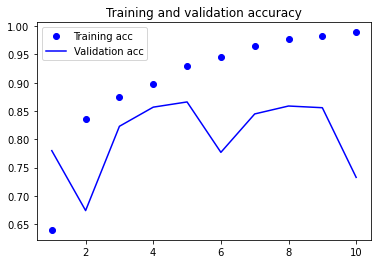

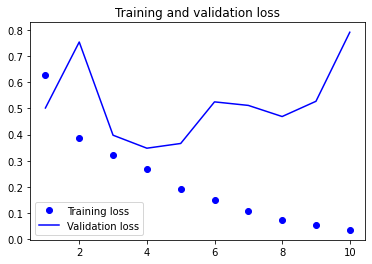

In [19]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc ,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss ,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

####  訓練相同模型而不使用預先訓練的文字嵌入向量

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 112ms/step - loss: 0.6973 - acc: 0.4700 - val_loss: 0.6913 - val_acc: 0.5308
Epoch 2/10
7/7 [==============================] - 1s 78ms/step - loss: 0.4972 - acc: 1.0000 - val_loss: 0.6958 -

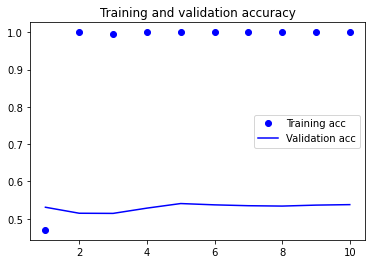

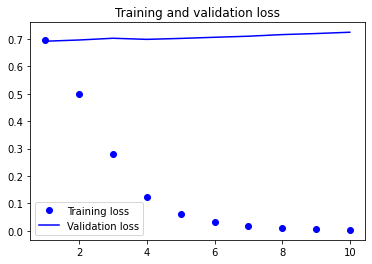

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))


############### 繪製
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
	dir_name = os.path.join(test_dir, label_type)
	for fname in sorted(os.listdir(dir_name)):
		if fname[-4:] == '.txt':
			f = open(os.path.join(dir_name, fname), encoding='UTF-8')
			texts.append(f.read())
			f.close()
			if label_type == 'neg':
				labels.append(0)
			else:
				labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [15]:
model.load_weights('./model/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: nan - acc: 0.5000


[nan, 0.5]

# 6-2 循環神經網路 RNN
  
![pic 6-3](https://raw.githubusercontent.com/hank199599/deep_learning_keras_log/main/pictures/6-3.png)  
  
透過持續與過去資訊的狀態(state)來迭代處理序列資料
* SimpleRNN：存在梯度消失的問題，無法實現理論上時間點t保留有關之前時間點所看到的資訊
* LSTM
* GRU

#### 以 Numpy 實現簡單的 RNN
概念：將輸入和狀態轉換成輸出→參數化兩個權重矩陣

In [16]:
畫import numpy as np

timesteps = 100   # 輸入序列資料中的時間點數量
input_features = 32  # 輸入特徵空間的維度數
output_features = 64  # 輸出特徵空間的維度數

inputs = np.random.random((timesteps, input_features))  # 輸入資料：隨機產生數值以便示範

state_t = np.zeros((output_features, ))  # 初始狀態：全零向量

W = np.random.random((output_features, input_features))  # 建立隨機權重矩陣
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:  #  input_t 是個向量, shape 為 (input_features, )
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)  # 結合輸入與當前狀態(前一個輸出)以取得當前輸出
    successive_outputs.append(output_t)  # 將此輸出儲存在列表中
    state_t = output_t  #更新下一個時間點的網絡狀態

final_output_sequence = np.concatenate(successive_outputs, axis=0)  
print(final_output_sequence.shape)

(6400,)


### 透過Keras的SimpleRNN層來進行實作

In [26]:
from keras.models import Sequential
from keras.layers import Embedding , SimpleRNN
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True)) # 增加代表時間點的軸
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### 增加多個循環層可以增加神經網路的表現能力

In [28]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True)) 
model.add(SimpleRNN(32,return_sequences=True)) 
model.add(SimpleRNN(32,return_sequences=True)) 
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


#### 準備 IMDB 資料

In [17]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  #考慮做為特徵的文字數量
maxlen = 500  # 我們只看每篇評論的前 500 個文字

batch_size = 32

print('讀取資料...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences') # 25000 筆訓練用序列資料 (評論)
print(len(input_test), 'test sequences')	# 25000 筆測試用序列資料

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) # 1. 只看每篇評論的前 500 個文字, 多的去除, 不足填補
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)	# shape=(25000, 500)
print('input_test shape:', input_test.shape)	# shape=(25000, 500)



讀取資料...
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

#### 以嵌入向量 Embedding 層和 SimpleRNN 層訓練模型

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 113ms/step - loss: 0.6280 - acc: 0.6400 - val_loss: 0.5020 - val_acc: 0.7800
Epoch 2/10
157/157 [==============================] - 20s 125ms/step - loss: 0.3868 - acc: 0.8364 - val_loss: 0.7545 - val_acc: 0.6742
Epoch 3/10
157/157 [==============================] - 19s 123ms/step - loss: 0.3226 - acc: 0.8740 - val_loss: 0.3977 - val_acc: 0.8230
Epoch 4/10
157/157 [==============================] - 19s 123ms/step - loss: 0.2698 - acc: 0.8968 - val_loss: 0.3480 - val_acc: 0.8568
Epoch 5/10
157/157 [==============================] - 19s 123ms/step - loss: 0.1929 - acc: 0.9288 - val_loss: 0.3661 - val_acc: 0.8660
Epoch 6/10
157/157 [==============================] - 19s 124ms/step - loss: 0.1505 - acc: 0.9459 - val_loss: 0.5254 - val_acc: 0.7770
Epoch 7/10
157/157 [==============================] - 20s 124ms/step - loss: 0.1069 - acc: 0.9643 - val_loss: 0.5118 - val_acc: 0.8448
Epoch 8/10
157/157 [==============================] - 1

#### 繪製結果

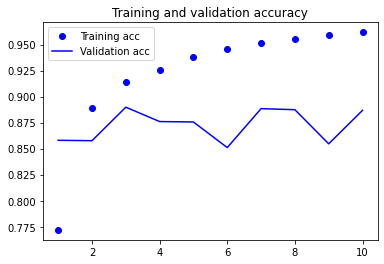

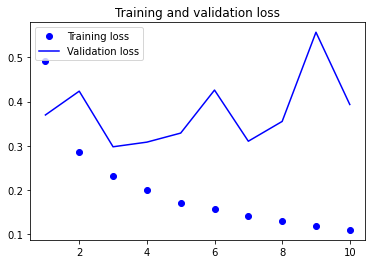

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc ,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss ,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 長期短期記憶(Long Short-Term Memory,LSTM)
增加一種跨維度乘載資訊的方法，從而防止太久遠的訊號在處理過程中逐漸消失  
![pic 6-4](https://raw.githubusercontent.com/hank199599/deep_learning_keras_log/main/pictures/6-4.png)

#### 在 Keras 中使用 LSTM 層 

Epoch 1/10
157/157 [==============================] - 46s 292ms/step - loss: 0.4910 - acc: 0.7719 - val_loss: 0.3699 - val_acc: 0.8580
Epoch 2/10
157/157 [==============================] - 46s 292ms/step - loss: 0.2856 - acc: 0.8888 - val_loss: 0.4237 - val_acc: 0.8576
Epoch 3/10
157/157 [==============================] - 46s 292ms/step - loss: 0.2317 - acc: 0.9141 - val_loss: 0.2979 - val_acc: 0.8898
Epoch 4/10
157/157 [==============================] - 45s 289ms/step - loss: 0.2009 - acc: 0.9256 - val_loss: 0.3085 - val_acc: 0.8760
Epoch 5/10
157/157 [==============================] - 45s 287ms/step - loss: 0.1709 - acc: 0.9378 - val_loss: 0.3289 - val_acc: 0.8756
Epoch 6/10
157/157 [==============================] - 45s 287ms/step - loss: 0.1573 - acc: 0.9453 - val_loss: 0.4262 - val_acc: 0.8510
Epoch 7/10
157/157 [==============================] - 46s 290ms/step - loss: 0.1425 - acc: 0.9518 - val_loss: 0.3105 - val_acc: 0.8884
Epoch 8/10
157/157 [==============================] - 4

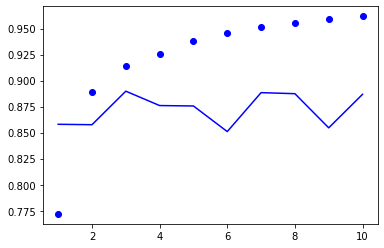

In [21]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

# 6-3 循環神經網路的進階用法
* 循環丟棄 (Recurrent dropout)
* 堆疊循環層 (Stacking recurrent layers)
* 雙向循環層 (Bidirectional recurent layers)

#### 檢視耶拿天氣資料集的資料

In [1]:
import os

data_dir = r'./data/'  # 您的 jena_climate 資料夾路徑
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv') # 資料集完整路徑

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)  # 
print(len(header))
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
15
420551


#### 解析資料

In [2]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
print(float_data.shape)   # 共有 420551 個時間點的天氣資料, 每個包含 14 種天氣數值

(420551, 14)


#### 觀察整個年度的變化

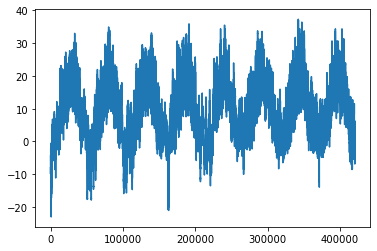

In [3]:
from matplotlib import pyplot as plt

temp = float_data[:, 1] # 索引 1 為 temperature 資料
plt.plot(range(len(temp)), temp)
plt.show()

#### 觀察資料集中前10天的溫度資料

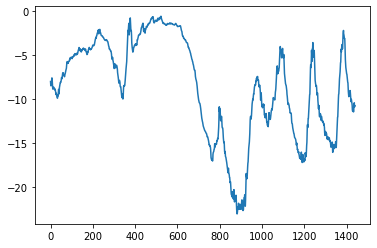

In [4]:
plt.plot(range(1440), temp[:1440])
plt.show()

我們將這個問題以下列方式描述:


* 從過去 lookback 個時間點開始(每個時間點為 10 分鐘), 以 steps個時間點 為間隔進行採樣,是否能預測 delay 個時間點的溫度?接下來會使用到以下的 lookback = 720, 觀察將前 天的資料

* steps = 6, 以每小時一個資料點進行採樣

* delay = = 144,目標是未來的24小時的溫度預測
  
開始前,需要先做兩件事:  
  
①將資料預先處理成神經網路可以讀取的格式:這很容易,因為資料已經是數字,因此不需要進行任何向量化,但是資料中的每個時間序列資料都有不同 的基準(例如,溫度通常介於-20 和 +30 之间,但大氣壓力則以毫巴(mbar) 為單位,大約為1,000).我們需要獨立標準化每個時間序列資料,以便都可 用相似的基準取得相對小的數值  
  
②撰寫一個資料產生器,以當前的浮點數資料陣列資料做為輸入,並從指定某個 過去的時間點開始,產生批次量資料以及未來的目標溫度,由於資料集中的 樣本是高度重複(樣本 N和樣本N +1會有相同的資料,也就是相隔10分 鐘的數據其實差不多),因此明確紀錄每個樣本很浪費時間,相對地,將使用產 生器,直接從原始資料即時產生樣本資料  
  
③先藉由減去每個時間序列資料的平均值並除以標準差來預先處理資料(標準化)。因為只使用前200, 000個時間點作為訓練資料,所以只計算此部分資料的 平均值和標準差

#### 標準化資料

In [5]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

#### 定義產生器函式以產生時間序列樣本及其目標樣本
* data - 原始浮點數資料的陣列,並用程式 6.24 進行標準化
* lookback - 輸入資料應回溯多少個時間點
* delay - 目標溫度應該在未來多少個時間點
* min_index 和 max_index 資料陣列中的最小與最大索 分時間點。界定一部分資料進行驗證以及另一部分用於測
* shuffle - 是否按照時間順序使用樣本或打亂樣本
* batch_size - 每批次的樣本數量
* step - 產生樣本資料的時間區隔(以時間點為單位)。目前 小時取一個資料點

In [6]:
def generator(data,lookback,delay,min_index,max_index,shuffle=False,batch_size=128,step=6):
    if max_index is not None:
        max_index = len(data) - delay -1
    
    i = min_index + lookback

    while 1:
        if shuffle:
            rows = np.random.randint(min_index+lookback , max_index ,size=batch_size)
        else:
            if i+batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i,min(i+batch_size,max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows),lookback//step,data.shape[-1]))

        targets = np.zeros((len(rows),))

        for j,row in enumerate(rows):
            indices = range(rows[j]-lookback,rows[j],step)
            samples[j]= data[indices]
            targets[j] = data[rows[j]+delay][1]
        
        yield samples,targets

#### 建立訓練資料、驗證資料與測試資料產生器

In [7]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

# 訓練資料產生器
train_gen = generator(float_data,lookback=lookback,delay=delay,min_index = 0,max_index=200000,shuffle=True,step=step,batch_size=batch_size)

# 驗證資料產生器
val_gen = generator(float_data,lookback=lookback,delay=delay,min_index = 200001,max_index=300000,shuffle=True,step=step,batch_size=batch_size)

# 測試資料產生器
val_gen = generator(float_data,lookback=lookback,delay=delay,min_index = 300001,max_index=None,shuffle=True,step=step,batch_size=batch_size)

val_steps = (300000-200001-lookback) // batch_size
test_steps = (len(float_data)-300001-lookback) // batch_size


### 案例分析
假定溫度時間序列是連續的，因此在每天的溫度變化具有一定的週期性
使用平均絕對誤差(MAE)來評估此種方法的可行性。

使用next()來驅動val_gen產生器，讓他吐出一個批次量的資料與標籤
[詳情參見網址](https://medium.com/@zhoumax/python-yield-a4caf2e6c0b8)

In [8]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):           # 計算所有驗證集資料
        samples , targets = next(val_gen)   # 驅動產生器
       # print(samples.shape)                # 回朔1440個時間點，並以6個時間點作為間隔進行取樣→共產生1440/6，讓他吐出一個批次輛
       # print(targets.shape)
        preds = samples[:,-1,1]
        mae = np.mean(np.abs(preds-targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [9]:
evaluate_naive_method()

0.3095763003800841


計算出的MAE約為0.29  
須將他透過平均絕對誤差0.29*溫度標準差temperature_std轉換得到對應的預測溫度

In [10]:
celsius_mae = 0.29*std[1]
celsius_mae #得到攝氏溫度誤差2.57℃

2.5672247338393395

## 一般的機器學習方法

In [11]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback//step,float_data.shape[-1])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch = 500,epochs=20,validation_data=val_gen,validation_steps=val_steps)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
500/500 [==============================] - 16s 32ms/step - loss: 1.7825 - val_loss: 0.8258
Epoch 2/20
500/500 [==============================] - 15s 30ms/step - loss: 0.7409 - val_loss: 0.6004
Epoch 3/20
500/500 [==============================] - 15s 30ms/step - loss: 0.4385 - val_loss: 0.2870
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3483 - val_loss: 0.2823
Epoch 5/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3419 - val_loss: 0.2719
Epoch 6/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3287 - val_loss: 0.2647
Epoch 7/20
500/500 [==============================] - 15s 31ms/step - loss: 0.3346 - val_loss: 0.2650
Epoch 8/20
500/500 [==============================] - 16s 31ms/step - loss: 0.3294 - val_loss: 0.2962
Epoch 9/20
500/500 [==============================] - 17s 34ms/step - loss: 0.3250 - val_loss: 0.2526
Epoch 

繪製驗證和訓練的損失曲線

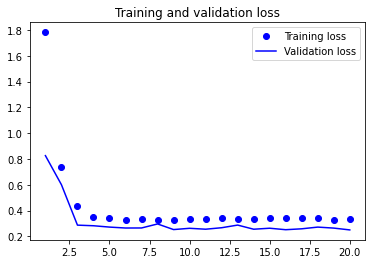

In [12]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 第一個循環基準方法

#### 閘控循環單元(gated recurrent unit,GRU)
原理與LSTM相同，但經過些許簡化使得執行成本較低  
缺點是模型的表現能力可能較差

In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=20,validation_data=val_gen,validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2991 - val_loss: 0.2833
Epoch 2/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2801 - val_loss: 0.2836
Epoch 3/20
500/500 [==============================] - 77s 155ms/step - loss: 0.2769 - val_loss: 0.2735
Epoch 4/20
500/500 [==============================] - 78s 155ms/step - loss: 0.2720 - val_loss: 0.2791
Epoch 5/20
500/500 [==============================] - 77s 154ms/step - loss: 0.2679 - val_loss: 0.2676
Epoch 6/20
500/500 [==============================] - 76s 151ms/step - loss: 0.2639 - val_loss: 0.2651
Epoch 7/20
500/500 [==============================] - 75s 151ms/step - loss: 0.2608 - val_loss: 0.2643
Epoch 8/20
500/500 [==============================] - 76s 152ms/step - loss: 0.2575 - val_loss: 0.2612
Epoch 9/20
500/500 [==============================] - 76s 151ms/step - loss: 0.2538 - val_loss: 0.2541
Epoch 10/20
500/500 [==============================] - 76s 151ms/step - l

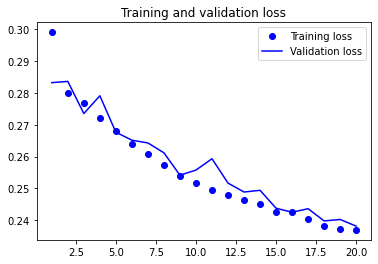

In [14]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 計算驗證損失

In [15]:
celsius_mae = 0.2346*std[1]
celsius_mae #得到攝氏溫度誤差2.25℃

2.0767962846852037

### 循環丟棄 (Recurrent dropout)
減少發生過度配適的問題  
  
在循環層使用丟棄法，應該在每個步驟(時間點)都使用相同的丟棄遮罩
由於透過丟棄法去常規化神經網路需要更長的時間使樣本空間收斂，所以訓練週期次數需要是原先的兩倍

In [16]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,dropout=0.2,recurrent_dropout=0.2,input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 101s 202ms/step - loss: 0.3230 - val_loss: 0.2906
Epoch 2/40
500/500 [==============================] - 101s 201ms/step - loss: 0.2994 - val_loss: 0.2862
Epoch 3/40
500/500 [==============================] - 101s 201ms/step - loss: 0.2920 - val_loss: 0.2803
Epoch 4/40
500/500 [==============================] - 100s 201ms/step - loss: 0.2904 - val_loss: 0.2825
Epoch 5/40
500/500 [==============================] - 100s 201ms/step - loss: 0.2855 - val_loss: 0.2769
Epoch 6/40
500/500 [==============================] - 100s 201ms/step - loss: 0.2821 - val_loss: 0.2757
Epoch 7/40
500/500 [==============================] - 101s 201ms/step - loss: 0.2784 - val_loss: 0.2699
Epoch 8/40
500/500 [==============================] - 112s 225ms/step - loss: 0.2772 - val_loss: 0.2682
Epoch 9/40
500/500 [==============================] - 108s 216ms/step - loss: 0.2744 - val_loss: 0.2671
Epoch 10/40
500/500 [==============================] - 107s 213m

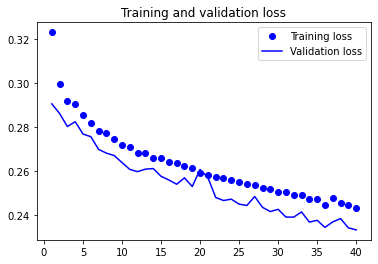

In [17]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 計算驗證損失

In [18]:
celsius_mae = 0.29*std[1]
celsius_mae #得到攝氏溫度誤差2.57℃

2.5672247338393395

### 堆疊循環層 (Stacking recurrent layers)
用於增加神經網路的容量  
例如：Google翻譯演算法適用七個大型LSTM層的堆疊

In [19]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,input_shape=(None,float_data.shape[-1])))
model.add(layers.GRU(64,activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 286s 572ms/step - loss: 0.3171 - val_loss: 0.2910
Epoch 2/40
500/500 [==============================] - 282s 565ms/step - loss: 0.2976 - val_loss: 0.2864
Epoch 3/40
500/500 [==============================] - 285s 570ms/step - loss: 0.2926 - val_loss: 0.2802
Epoch 4/40
500/500 [==============================] - 282s 565ms/step - loss: 0.2870 - val_loss: 0.2752
Epoch 5/40
500/500 [==============================] - 285s 570ms/step - loss: 0.2816 - val_loss: 0.2721
Epoch 6/40
500/500 [==============================] - 309s 617ms/step - loss: 0.2790 - val_loss: 0.2651
Epoch 7/40
500/500 [==============================] - 306s 612ms/step - loss: 0.2723 - val_loss: 0.2581
Epoch 8/40
500/500 [==============================] - 309s 618ms/step - loss: 0.2705 - val_loss: 0.2602
Epoch 9/40
500/500 [==============================] - 304s 607ms/step - loss: 0.2682 - val_loss: 0.2566
Epoch 10/40
500/500 [==============================] - 290s 580m

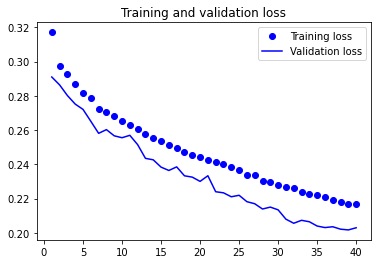

In [20]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 自結果所得的結論
1. 不會發生嚴重的過度配適，但會造成不可忽略的計算成本
2. 增加神經網路容量並未獲得較大的回報

### 雙向循環層 (Bidirectional recurent layers)
充分利用RNN在資料順序的靈敏度，透過雙向處理序列資料取得單向RNN可能忽略掉的patterns

##### 建立反向的序列資料產生器

In [21]:
def generator(data,lookback,delay,min_index,max_index,shuffle=False,batch_size=128,step=6):
    if max_index is not None:
        max_index = len(data) - delay -1
    
    i = min_index + lookback

    while 1:
        if shuffle:
            rows = np.random.randint(min_index+lookback , max_index ,size=batch_size)
        else:
            if i+batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i,min(i+batch_size,max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows),lookback//step,data.shape[-1]))

        targets = np.zeros((len(rows),))

        for j,row in enumerate(rows):
            indices = range(rows[j]-lookback,rows[j],step)
            samples[j]= data[indices]
            targets[j] = data[rows[j]+delay][1]
        
        yield samples[:,::,-1,:],targets

In [23]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers

from keras.models import Sequential

max_features = 10000  # 考慮作為特徵的文字數量
maxlen = 500  #只看每篇評論的前 500 個字

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)  # 載入資料


x_train = [x[::-1] for x in x_train]    # 將訓練資料進行反向順序排列
x_test = [x[::-1] for x in x_test]      # 將測試資料進行反向順序排列

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # 填補序列資料
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [24]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 59s 375ms/step - loss: 0.5004 - acc: 0.7599 - val_loss: 0.4970 - val_acc: 0.8132
Epoch 2/10
157/157 [==============================] - 58s 370ms/step - loss: 0.3120 - acc: 0.8792 - val_loss: 0.3174 - val_acc: 0.8810
Epoch 3/10
157/157 [==============================] - 58s 372ms/step - loss: 0.2570 - acc: 0.9066 - val_loss: 0.3663 - val_acc: 0.8666
Epoch 4/10
157/157 [==============================] - 59s 373ms/step - loss: 0.2217 - acc: 0.9195 - val_loss: 0.3334 - val_acc: 0.8794
Epoch 5/10
157/157 [==============================] - 59s 374ms/step - loss: 0.1908 - acc: 0.9320 - val_loss: 0.3658 - val_acc: 0.8792
Epoch 6/10
157/157 [==============================] - 59s 374ms/step - loss: 0.1720 - acc: 0.9378 - val_loss: 0.3521 - val_acc: 0.8712
Epoch 7/10
157/157 [==============================] - 59s 377ms/step - loss: 0.1554 - acc: 0.9473 - val_loss: 0.4077 - val_acc: 0.8590
Epoch 8/10
157/157 [==============================] - 5

In [25]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), 
                               input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/40
500/500 [==============================] - 93s 187ms/step - loss: 0.2867 - val_loss: 0.2827
Epoch 2/40
500/500 [==============================] - 92s 185ms/step - loss: 0.2723 - val_loss: 0.2765
Epoch 3/40
500/500 [==============================] - 93s 185ms/step - loss: 0.2671 - val_loss: 0.2651
Epoch 4/40
500/500 [==============================] - 93s 185ms/step - loss: 0.2614 - val_loss: 0.2611
Epoch 5/40
500/500 [==============================] - 93s 186ms/step - loss: 0.2588 - val_loss: 0.2585
Epoch 6/40
500/500 [==============================] - 93s 185ms/step - loss: 0.2550 - val_loss: 0.2577
Epoch 7/40
500/500 [==============================] - 93s 186ms/step - loss: 0.2542 - val_loss: 0.2556
Epoch 8/40
500/500 [==============================] - 93s 186ms/step - loss: 0.2513 - val_loss: 0.2522
Epoch 9/40
500/500 [==============================] - 93s 185ms/step - loss: 0.2477 - val_loss: 0.2487
Epoch 10/40
500/500 [==============================] - 93s 186ms/step - l

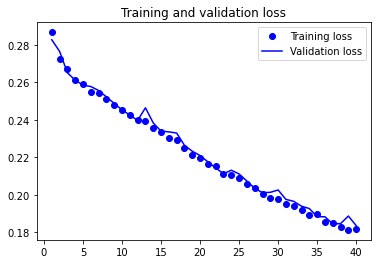

In [26]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

運用反向序列資料訓練和驗證LSTM

In [31]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers

from keras.models import Sequential

max_features = 10000
maxlen = 500
(x_train , y_train),(x_test,y_test) = imdb.load_data(num_words = max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features,128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

### Bidirectional 雙向層
以兩種方式檢視輸入序列，以取得更豐富的表示法並獲得僅由時間順序可能遺漏的pattern

#### 訓練和驗證雙向LSTM

In [34]:
model = Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 89s 569ms/step - loss: 0.5373 - acc: 0.7344 - val_loss: 1.1044 - val_acc: 0.5578
Epoch 2/10
157/157 [==============================] - 85s 543ms/step - loss: 0.3389 - acc: 0.8742 - val_loss: 0.3500 - val_acc: 0.8556
Epoch 3/10
157/157 [==============================] - 85s 542ms/step - loss: 0.2681 - acc: 0.9016 - val_los

訓練雙向GRU進行溫度預測任務

In [36]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32),input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(),loss='mae')

history = model.fit(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 93s 186ms/step - loss: 0.2877 - val_loss: 0.2774
Epoch 2/40
500/500 [==============================] - 93s 185ms/step - loss: 0.2719 - val_loss: 0.2705
Epoch 3/40
500/500 [==============================] - 98s 196ms/step - loss: 0.2660 - val_loss: 0.2696
Epoch 4/40
500/500 [==============================] - 96s 193ms/step - loss: 0.2645 - val_loss: 0.2620
Epoch 5/40
500/500 [==============================] - 102s 205ms/step - loss: 0.2612 - val_loss: 0.2632
Epoch 6/40
500/500 [==============================] - 101s 201ms/step - loss: 0.2585 - val_loss: 0.2581
Epoch 7/40
500/500 [==============================] - 106s 212ms/step - loss: 0.2556 - val_loss: 0.2553
Epoch 8/40
500/500 [==============================] - 107s 213ms/step - loss: 0.2513 - val_loss: 0.2536
Epoch 9/40
500/500 [==============================] - 100s 199ms/step - loss: 0.2518 - val_loss: 0.2532
Epoch 10/40
500/500 [==============================] - 100s 201ms/st

# 6-4 使用卷積神經網路進行序列資料處理

## 1D 卷積神經網路

## 結合 CNN 與 RNN 來處理長序列資料